# Food Safety Rating: EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext watermark

In [6]:
%watermark 

Last updated: 2022-09-10T16:01:02.988767+01:00

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [9]:
food_safety = pd.read_pickle('processed_data/food_ratings.pkl')
food_safety.head()

,awaiting_inspection,business_name,business_type,business_type_id,business_type_primary,exempt,geocode_latitude,geocode_longitude,new_rating_pending,post_code,post_code_outer,rating_date,rating_value,scores_confidence_in_management,scores_hygiene,scores_structural
0,0,38 St Giles Boutique Bed And Breakfrast,Hotel/bed & breakfast/guest house,7842,Hotel,0,52.629101,1.289821,False,NR2 1LL,NR2,2019-10-09,5.0,5.0,0.0,0.0
1,0,Catherines Coffee Lounge,Restaurant/Cafe/Canteen,1,Restaurant,0,52.629102,1.289822,False,NR2 1LL,NR2,2022-03-08,5.0,5.0,5.0,5.0
2,0,Chestnut Nursery School,Caring Premises,5,Caring Premises,0,52.629101,1.289821,False,NR2 1LL,NR2,2022-06-27,5.0,5.0,0.0,0.0
3,0,9 Bar,Pub/bar/nightclub,7843,Pub,0,52.629297,1.300907,False,NR1 1BG,NR1,2019-03-13,5.0,5.0,5.0,5.0
4,0,Sugar And Spice,Pub/bar/nightclub,7843,Pub,0,52.629297,1.300907,False,NR1 1BG,NR1,2018-04-16,5.0,5.0,5.0,0.0


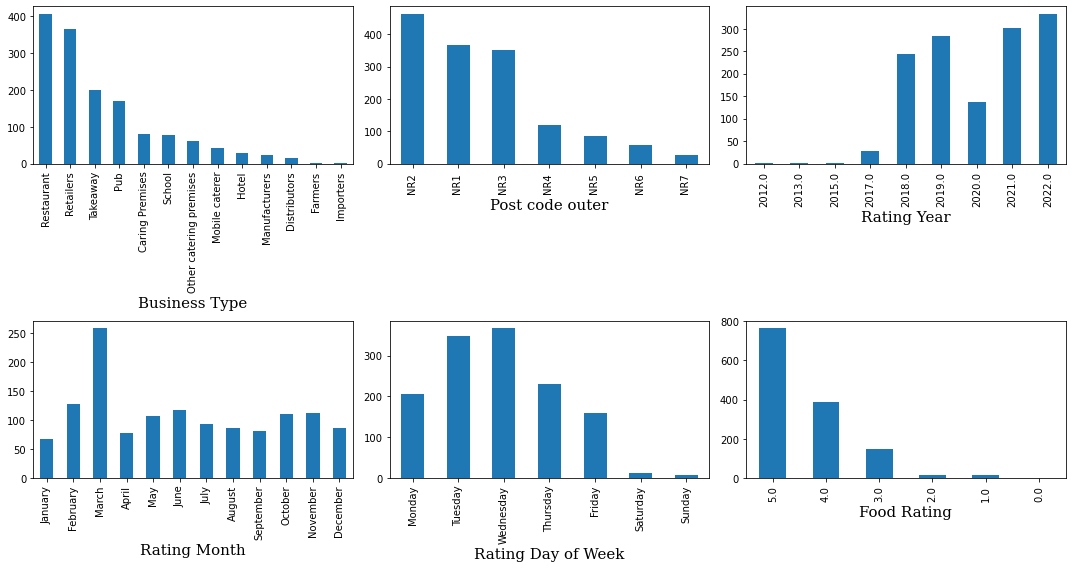

In [118]:
_, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

food_safety.business_type_primary.value_counts().plot(kind="bar", ax=ax[0, 0])
food_safety.post_code_outer.value_counts().plot(kind="bar", ax=ax[0, 1])
food_safety.rating_date.dt.year.value_counts(ascending=True).sort_index().plot(
    kind="bar", ax=ax[0, 2]
)
food_safety.rating_date.dt.month_name().value_counts(ascending=True).reindex(
    [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ]
).plot(kind="bar", ax=ax[1, 0])
food_safety.rating_date.dt.day_name().value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).plot(kind="bar", ax=ax[1, 1])
food_safety.rating_value.value_counts().plot(kind="bar", ax=ax[1, 2])

ax[0, 0].set_xlabel("Business Type", fontsize=15, fontname="serif")
ax[0, 1].set_xlabel("Post code outer", fontsize=15, fontname="serif")
ax[0, 2].set_xlabel("Rating Year", fontsize=15, fontname="serif")
ax[1, 0].set_xlabel("Rating Month", fontsize=15, fontname="serif")
ax[1, 1].set_xlabel("Rating Day of Week", fontsize=15, fontname="serif")
ax[1, 2].set_xlabel("Food Rating", fontsize=15, fontname="serif")

plt.tight_layout()
plt.show()

In [133]:
# filter out years 2012-2015 since only 1 rating for each
food_safety = food_safety.query('rating_date.dt.year > 2015', engine='python')

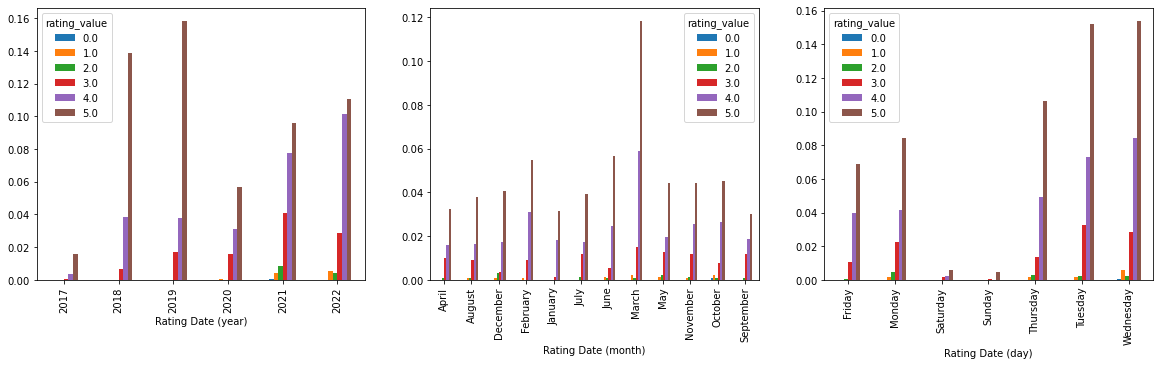

In [152]:
_, ax = plt.subplots(ncols=3, figsize=(20, 5))
pd.crosstab(
    food_safety.rating_date.dt.year, food_safety.rating_value, normalize=True
).plot(kind="bar", ax=ax[0])
pd.crosstab(
    food_safety.rating_date.dt.month_name(), food_safety.rating_value, normalize=True
).plot(kind="bar", ax=ax[1])
pd.crosstab(
    food_safety.rating_date.dt.day_name(), food_safety.rating_value, normalize=True
).plot(kind="bar", ax=ax[2])

ax[0].set_xlabel("Rating Date (year)")
ax[1].set_xlabel("Rating Date (month)")
ax[2].set_xlabel("Rating Date (day)")
plt.show()

<AxesSubplot:xlabel='scores_confidence_in_management'>

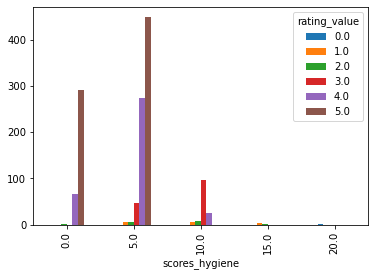

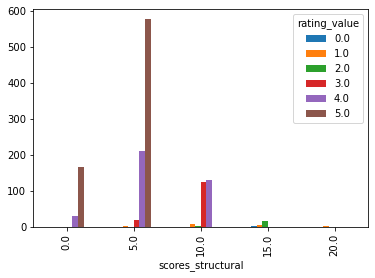

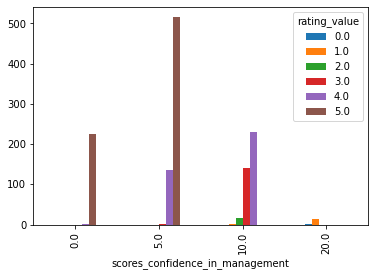

In [135]:
pd.crosstab(food_safety.scores_hygiene, food_safety.rating_value).plot(kind='bar')
pd.crosstab(food_safety.scores_structural, food_safety.rating_value).plot(kind='bar')
pd.crosstab(food_safety.scores_confidence_in_management, food_safety.rating_value).plot(kind='bar')

In [139]:
pd.crosstab(food_safety.scores_confidence_in_management, food_safety.rating_date.dt.year)
pd.crosstab(food_safety.scores_hygiene, food_safety.rating_date.dt.year)
pd.crosstab(food_safety.scores_structural, food_safety.rating_date.dt.year)


rating_date,2017,2018,2019,2020,2021,2022
scores_structural,,,,,,
0.0,8,61,49,12,27,37
5.0,19,160,199,89,157,181
10.0,0,21,28,34,93,85
15.0,0,0,0,0,13,6
20.0,0,0,0,0,0,1


In [161]:
food_safety.groupby(['post_code_outer']).agg({'rating_value':'mean'})
food_safety.groupby(['business_type_primary']).agg({'rating_value':'mean'})

,rating_value
business_type_primary,
Caring Premises,4.632812
Distributors,4.500000
Farmers,4.500000
Hotel,4.644531
Importers,5.000000
Manufacturers,4.589844
Mobile caterer,4.429688
Other catering premises,4.480469
Pub,4.433594
